In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
data = pd.read_csv('D:/Chools/Day_08/Universities.csv')

In [3]:
data.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
data.columns

Index(['Univ', 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [6]:

# Extract features
features = ['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate']

# Standardize the feature values
X = StandardScaler().fit_transform(data[features])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Create a DataFrame with PCA results
data_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
data_pca['Univ'] = data['Univ']

data_pca

,PC1,PC2,Univ
0,-1.009874,-1.064310,Brown
1,-2.822238,2.259045,CalTech
2,1.112466,1.631209,CMU
3,-0.741741,-0.042187,Columbia
4,-0.311912,-0.635244,Cornell
5,-1.696691,-0.344363,Dartmouth
6,-1.246821,-0.490984,Duke
7,-0.338750,-0.785169,Georgetown
8,-2.374150,-0.386539,Harvard
9,-1.403277,2.119515,JohnsHopkins


In [7]:
# Explained variance ratio for each principal component
explained_var_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio (PCA):", explained_var_ratio)
print("Total Explained Variance (PCA):", sum(explained_var_ratio))

Explained Variance Ratio (PCA): [0.76868084 0.13113602]
Total Explained Variance (PCA): 0.8998168680137351


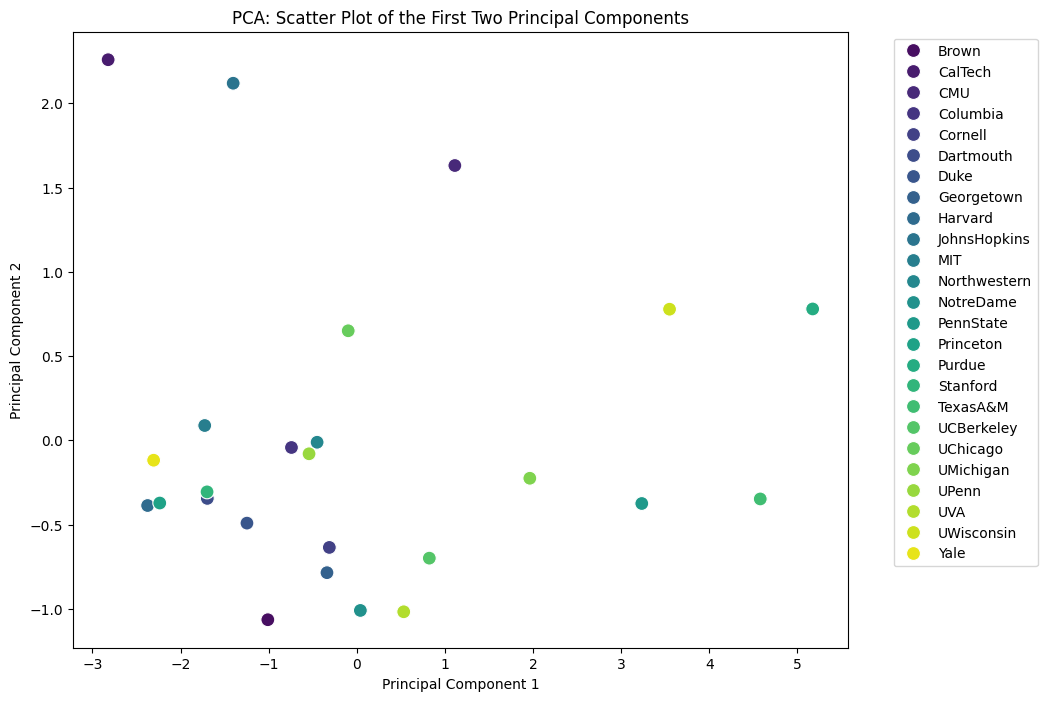

In [8]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=data_pca, hue='Univ', palette='viridis', s=100)
plt.title('PCA: Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

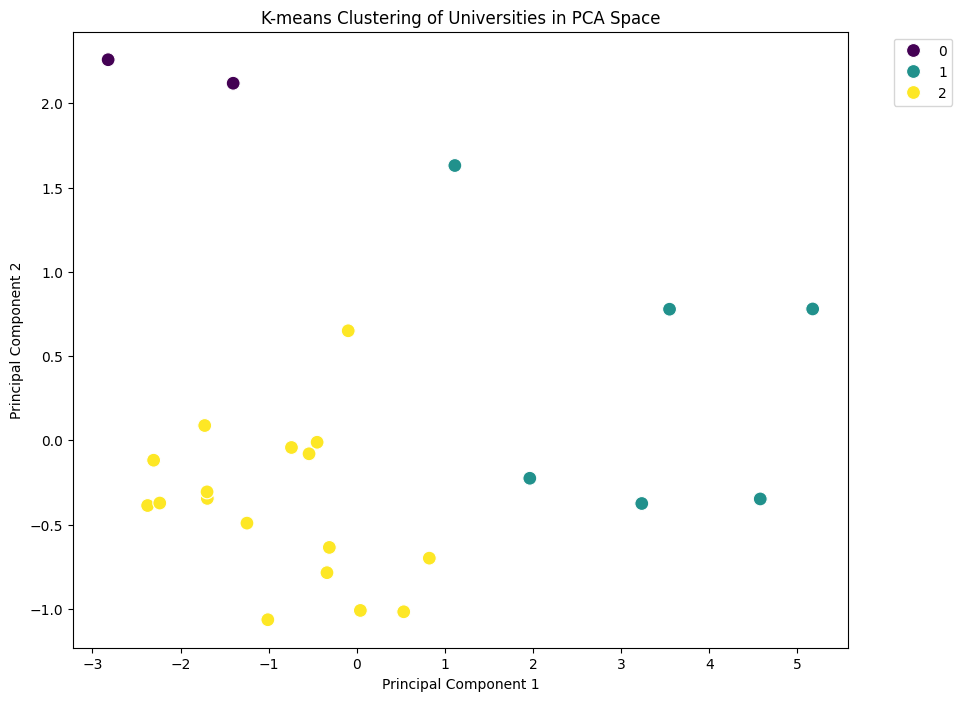

University Clusters:
            Univ  Cluster
0          Brown        2
1        CalTech        0
2            CMU        1
3       Columbia        2
4        Cornell        2
5      Dartmouth        2
6           Duke        2
7     Georgetown        2
8        Harvard        2
9   JohnsHopkins        0
10           MIT        2
11  Northwestern        2
12     NotreDame        2
13     PennState        1
14     Princeton        2
15        Purdue        1
16      Stanford        2
17      TexasA&M        1
18    UCBerkeley        2
19      UChicago        2
20     UMichigan        1
21         UPenn        2
22           UVA        2
23    UWisconsin        1
24          Yale        2


In [9]:
from sklearn.cluster import KMeans

# Extract the principal components for clustering
X = data_pca[['PC1', 'PC2']]

# Specify the number of clusters (you can adjust this based on your preference)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_pca['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters on the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=data_pca, hue='Cluster', palette='viridis', s=100)
plt.title('K-means Clustering of Universities in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

# Display the universities and their corresponding clusters
print("University Clusters:")
print(data_pca[['Univ', 'Cluster']])

In [10]:

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=min(30, len(data)-1), n_iter=300)
tsne_result = tsne.fit_transform(X)


# Create a DataFrame with t-SNE results
data_tsne = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
data_tsne['Univ'] = data['Univ']

data_tsne

,t-SNE1,t-SNE2,Univ
0,-13.883470,0.330844,Brown
1,7.445953,19.018795,CalTech
2,-0.721513,6.260233,CMU
3,15.075957,-11.521697,Columbia
4,13.664262,5.945866,Cornell
5,7.504340,-6.100738,Dartmouth
6,-13.701433,9.639211,Duke
7,10.423548,-0.077770,Georgetown
8,16.556284,-4.030740,Harvard
9,0.917317,-16.398552,JohnsHopkins


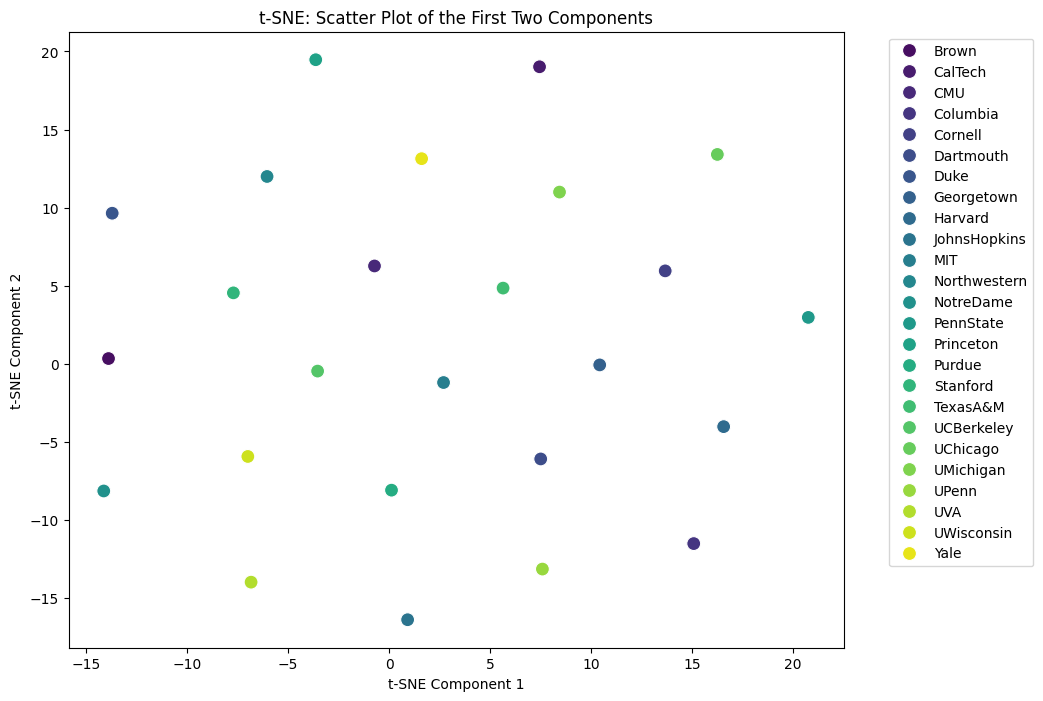

In [11]:
import seaborn as sns

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=min(30, len(data)-1), n_iter=300)
tsne_result = tsne.fit_transform(X)

# Create a DataFrame with t-SNE results
data_tsne = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
data_tsne['Univ'] = data['Univ']

# Plot t-SNE using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=data_tsne, hue='Univ', palette='viridis', s=100)
plt.title('t-SNE: Scatter Plot of the First Two Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()
